In [ ]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

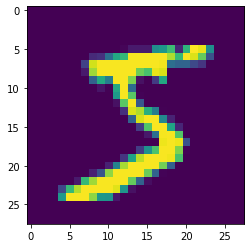

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [8]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')

In [9]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.3114 - accuracy: 0.9495 - val_loss: 0.1018 - val_accuracy: 0.9677
Epoch 2/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0725 - accuracy: 0.9777 - val_loss: 0.0823 - val_accuracy: 0.9742
Epoch 3/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.1124 - val_accuracy: 0.9694
Epoch 4/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0873 - val_accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0918 - val_accuracy: 0.9749


In [13]:
metrics = model.evaluate(x_test, y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.09184733778238297, 0.9749000072479248]


In [14]:
prediction=model.predict(x_test[:4])
print(prediction)

[[2.4008862e-10 1.1476892e-19 2.2257614e-10 4.9387716e-11 1.4776941e-17
  6.3154676e-16 2.6262310e-22 1.0000000e+00 4.0401696e-10 3.3025051e-11]
 [3.5060163e-11 1.5390727e-13 1.0000000e+00 6.2763537e-13 3.9879461e-18
  2.4089166e-15 1.5518520e-08 5.6999312e-18 9.8757912e-12 3.1735336e-16]
 [8.6419244e-10 9.9999511e-01 2.3542850e-06 1.0598035e-11 5.4953034e-07
  3.8273578e-07 1.9825417e-07 2.0183363e-07 1.1020514e-06 1.9542963e-10]
 [1.0000000e+00 3.9385825e-19 1.7386091e-11 6.1442155e-20 1.5367538e-15
  5.7584268e-14 1.3724724e-12 3.2429446e-14 8.3426180e-13 6.8348849e-10]]


In [15]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(test loss & Test Accuracy): ")
print(metrics)

Metrics(test loss & Test Accuracy): 
[0.09184733778238297, 0.9749000072479248]


In [17]:
predction=model.predict(x_test[:4])
print(prediction)

[[2.4008862e-10 1.1476892e-19 2.2257614e-10 4.9387716e-11 1.4776941e-17
  6.3154676e-16 2.6262310e-22 1.0000000e+00 4.0401696e-10 3.3025051e-11]
 [3.5060163e-11 1.5390727e-13 1.0000000e+00 6.2763537e-13 3.9879461e-18
  2.4089166e-15 1.5518520e-08 5.6999312e-18 9.8757912e-12 3.1735336e-16]
 [8.6419244e-10 9.9999511e-01 2.3542850e-06 1.0598035e-11 5.4953034e-07
  3.8273578e-07 1.9825417e-07 2.0183363e-07 1.1020514e-06 1.9542963e-10]
 [1.0000000e+00 3.9385825e-19 1.7386091e-11 6.1442155e-20 1.5367538e-15
  5.7584268e-14 1.3724724e-12 3.2429446e-14 8.3426180e-13 6.8348849e-10]]


In [18]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
model.save('mnistCNN.h5')